In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Simulate a Dataset Using Numpy Array 
Using Numpy array to wrap Python array to gain benefits from Numpy library

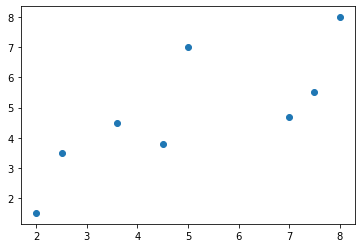

In [2]:
X = np.array([2.0, 2.5, 3.6, 4.5, 5.0, 7.0, 7.5, 8.0])
Y = np.array([1.5, 3.5, 4.5, 3.8, 7.0, 4.7, 5.5, 8.0])
plt.scatter(X, Y)

## 2. How to Fit a Good Line

### 2.1. What is Residual Sum of Squares?

Assumption: $X$ and $Y$ have a linear relationship


To predict $Y$ based on $x_{i}$ - the $i$th value of $X$, we use: $\hat{y_{i}} = \hat{\beta_{0}} + \hat{\beta_{1}}x_{i}$ 


The difference between the true $y_{i}$ and the estimated $\hat{y_{i}}$ is: $y_{i} - \hat{y_{i}}$ = $y{i} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{i}$

A good fitted line is the one that gives the smallest error between $y_{i}$ and $\hat{y_{i}}$. In other words, this happens when the total distance from each observation point to the fitted line is smallest. The measurement of distance between observations is __Residual Sum of Squares (RSS)__:

$RSS = \sum_{i=1}^{n} (y_{i} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{i})^2$

or equivalent as:

$RSS = (y_{1} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{1})^2 + (y_{2} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{2})^2 + ... + (y_{n} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{n})^2$

Our purpose is to minimize $RSS$.

<img src="figures/RSS.png" style="width:400px;"/>

### 2.2. How to Minimize Residual Sum of Squares?

#### 2.2.1. Characteristics of a Convex Model
Plotting RSS in a 3D environment, we can see that RSS plot is convex and therefore has a minimum, which is highlighted as a red dot. The minimum point of a convex model is calculated by setting RSS derivative to zero.

Derivative is the rate of change. This means if $A$ changes $h$ units, how will $B$ react to that change which is denoted as $\frac{\partial A}{\partial B}$ - the derivative of $A$ with respect to $B$.

If the derivative of $A$ with respect to $B$ is zero, it means that, at this point, changes in $B$ do not affect $A$. When this happens, we have found the minimum value of the convex function.

Hence, in order to find the min value of RSS, we set the derivative of RSS to zero and find the unknowns.

<img src="figures/3D_RSS.png" style="width:400px;"/>

#### 2.2.2. Calculate the Derivative of RSS
As mentioned in the previous section, with the objective of minimizing RSS, we need to find RSS derivative with respect to the unknowns. In this case, two unknowns are $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ because we already have data on $X$ and $Y$, now we need to find $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ to plot a line representing $X$ and $Y$ relationship.

The derivative of RSS with respect to $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ are partial derivative of a multivariate function, denoted as: $\frac{\partial RSS}{\partial \hat{\beta_{0}}}$ and $\frac{\partial RSS}{\partial \hat{\beta_{1}}}$ 

To minimize RSS, we set these partial derivatives to zero. After computing with some calculus techniques, the optimal $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ are: $\; \beta_1 = \frac{\sum_{i=1}^{n}x_{i}(y_{i}-\bar{y})}{\sum_{i=1}^{n}x_{i}(x_{i}-\bar{x})}, \; \beta_0 = \bar{y} - \hat{\beta_{1}}\bar{x}$

Substitute the value of $x_{i}$ and $y_{i}$ into the optimal function for $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$, we can plot the optimal fitted line.

### 2.3. Demonstrate Line Fitting Process
Using what we have learnt from section 3, the process of finding the fitted line is demonstrated below.

In [3]:
y_bar = np.mean(Y)
x_bar = np.mean(X)

In [4]:
b1_num = np.dot(X, Y - y_bar)
b1_den = np.dot(X, X - x_bar)
b1 = b1_num/b1_den

In [5]:
b0 = y_bar - b1*x_bar

In [6]:
def model(x):
    return b0 + b1 * x

In [7]:
X_plot = np.arange(0, 10)
Y_plot = np.array([model(x) for x in X_plot])

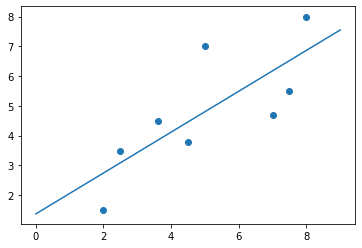

In [8]:
plt.scatter(X, Y)
plt.plot(X_plot, Y_plot)

## 3. Evaluate the Accuracy of the Coefficient Estimates
### 3.1. Evaluate Sample Error of $\hat{\mu}$
The standard error of $\hat{\mu}$ is a measurement on how accurate the sample mean $\widehat{\mu}$ is as an estimation of $\mu$. Standard error of the mean is calculated the following formula:          

$Var(\hat{\mu}) = SE(\hat{\mu})^2 = \frac{\sigma^2}{n}$

where $\sigma$ is the standard deviation of the population, which can be estimated by standard deviation of the mean. 

From this formular we understand that the larger the sample size ($n$), the closer $\hat{\mu}$ is to the actual $\mu$

### 3.2. Evaluate $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$
The same idea applies to $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$. We can measure how close $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ are to the true $\beta_{0}$ and $\beta_{1}$ using:


$SE(\hat{\beta_{0}})^2 = \sigma^2 \left [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}(x_{i} - \bar{x})^2} \right ], \;    SE(\hat{\beta_{1}})^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x_{i} - \bar{x})^2}$


where $\sigma^2 = Var(\epsilon )$. In general, $\sigma^2$ is not known, but can be estimated from the data. The estimate of $\sigma$ is __Residual Standard Error__: 


$RSE=\sqrt{\frac{RSS}{n-2}}$

### 3.3. The Use of $SE(\hat{\beta_{0}})$ and $SE(\hat{\beta_{1}})$

#### 3.3.1. To Calculate Confidence Intervals
Confidence interval is a range of values, with a certain probability, will contain the true value of an unknown parameter.

For linear regression, the $95\%$ confidence interval for $\beta_{1}$ is: $\left [ \hat{\beta_{1}} - 2.SE(\beta_{1}), \; \hat{\beta_{1}} + 2.SE(\beta_{1}) \right ]$

Similarly, a confidence interval for $\beta_{0}$ takes the form:    $\hat{\beta_{0}} \pm 2.SE(\beta_{0})$
 
#### 3.3.2. To Perform Hypothesis Tests
Another use for standard errors is to perform hypothesis tests. Commonly, there will be a null hypothesis and an alternative one:

$H_{0}$ : $\beta_{1} = 0$  or  There is no relationship between $X$ and $Y$

$H_{1}$ : $\beta_{1} \neq 0$  or  There is some relationship between $X$ and $Y$

To test the null hypothesis, we need to determine how far is $\hat{\beta_{1}}$ from zero, this depends on how accurate $\hat{\beta_{1}}$ for estimating $\beta{1}$ which is $SE(\hat{\beta_{1}})$. Basically, there are two rules to remember:

1. If $SE(\hat{\beta_{1}})$ is small, $\hat{\beta_{1}}$ can be a small number
2. If $SE(\hat{\beta_{1}})$ is large, $\hat{\beta_{1}}$ must be a large number, far from zero

In practice, we compute a *t-statistic* given by: $\; t = \frac{\beta_{1}}{SE(\hat{\beta_{1}})}$

The t-statistic measures the number of standard deviation that $\beta_{1}$ is away from $0$, which mean if we were to reject the null hypothesis, the *t-statistic* should be a large number.

Another important concept in hypothesis testing is $p-value$. It is the probability of obtaining a number that is equal or larger than $|t|$. The smaller p-value is, the more unlikely the result is by chance, hence, reconfirm our findings. 

To visualize the idea of p-value, let's have a look at the image below.

<img src="figures/p-value.png" style="width:550px;"/>

From the image, we can see that p-value = $P(|t| \geq Value)$ which is the area highlighted in green. If p-value is smaller than $0.05$ or $0.01$, the p-value is significant and we can conclude that there is some relationship between $X$ and $Y$.

In that case, we will reject $H_{0}$ in favor of the alternative hypothesis.

### 3.4. Demonstrate the Process of Evaluating Estimated Coefficients
#### 3.4.1. Evaluate Standard Error of $\hat{\mu}$

$SE(\hat{\mu}) = \frac{\sigma}{\sqrt{n}} \approx 0.81$ with $\sigma$ being estimated by the sample standard deviation $s$.

$s = \sqrt{\frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^2}{n-1}}$

In [9]:
n = len(X)
sd_num = np.sum((X - x_bar)**2)
sd_den = n - 1

sd = np.sqrt(sd_num/sd_den)

se_mu = sd/np.sqrt(n)

se_mu

0.8096378158517193

#### 3.4.2. Evaluate Standard Error of $SE(\hat{\beta_{0}})^2$ and $SE(\hat{\beta_{1}})^2$ 

$SE(\hat{\beta_{0}})^2 = \sigma^2 \left [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}(x_{i} - \bar{x})^2} \right ] = 1.96$

$SE(\hat{\beta_{1}})^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x_{i} - \bar{x})^2} = 0.05$     

with $\sigma^2 = Var(\epsilon)$ which is estimated by *Residual Standard Error*:      $RSE=\sqrt{\frac{RSS}{n-2}}$

In [20]:
rss = np.square(Y - model(X)).sum()

rse = np.sqrt(rss/(n-2))

se_b0_squared = rse**2 * ( 1/n + x_bar**2 / np.sum((Y - y_bar)**2) )
se_b0_squared

1.9554996554921125

In [11]:
se_b1_squared = rse**2 / np.sum((X - x_bar)**2)
se_b1_squared

0.05413595545131918

#### 3.4.3. Calculate 95% Confidence Interval

* __95% Confidence Interval for $\beta_{0}$:__ [-1.43, 4.17]

In [12]:
b0_lower = b0 - 2*np.sqrt(se_b0_squared)
b0_upper = b0 + 2*np.sqrt(se_b0_squared)
b0_cf = [b0_lower, b0_upper]
b0_cf

[-1.4278491025334041, 4.165718139207219]

* __95% Confidence Interval for $\beta_{1}$:__ [0.22, 1.15]

In [13]:
b1_lower = b1 - 2*np.sqrt(se_b1_squared)
b1_upper = b1 + 2*np.sqrt(se_b1_squared)
b1_cf = [b1_lower, b1_upper]
b1_cf

[0.22165291444672486, 1.1523383001819405]

#### 3.4.4. Calculate *t-statistic* and *p-value*
$t = \frac{\hat{\beta_{1}}}{SE(\beta_{1})} = 2.95$

Look up *p-value* in the t-table with 6 degrees of freedom (sample size is 8, 2 variables in the model). We will find that: $0.02 <$ *p-value* $<0.04$, which is smaller than $0.05$.

We will reject the null hypothesis in favor of the alternative and conclude that $X$ and $Y$ have some relationship.

In [14]:
t = b1/np.sqrt(se_b1_squared)
t

2.952643794966761

## 4. Evaluate the Model
After conclude that we can reject $H_{0}$ in favor of $H_{1}$, it is time to quantify *the extent to which the model fits the data* (level of fit). There are two common methods of evaluating a linear regression model.

### 4.1. Lack of Fit Indicator - Residual Standard Error (RSE)
The $RSE$ is an estimate of the standard deviation of $\epsilon$. Roughly speaking, it is the average amount that the response will deviate from the true regression line.

As mentioned from previous part: $RSE= \sqrt{\frac{RSS}{n-2}} = \sqrt{\frac{\sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^2}{n-2}}$

After calculating $RSE$, we will evaluate the lack of fit using percentage of error: $\frac{RSS}{\bar{y}} \times 100\%$.

If the model is a good fit for the dataset, meaning  $\hat{y_{i}} \approx y_{i}$ for $i = 1, ..., n$, the error percentage should be low. On the other hand, if $\hat{y_{i}}$ is very far from $y_{i}$ for one or more observations, $RSE$ may be quite large showing that the model lacks of fit.

### 4.2. Goodness of Fit Indicator - $R^2$ 
$R^2$ is an alternative to measure fit. It takes the form of a proportion ($0 \leq R^2 \leq 1$) - the *__proportion of variance explained__*.

$R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$ where: 

Total Sum of Squares: $TSS = \sum(y_{i} - \bar{y})^2$

Residual Sum of Squares: $RSS = \sum(y_{i} - \hat{y_{i}})^2$

TSS is the total variance of variable Y before the regression is performed. RSS is the errors that remains after the regression is performed. Hence $TSS - RSS$ is the amount of variance that is explained using the model. The percentage show how much of $Y$ has been explained by $X$ using the model.

Usually, a high $R^2$ shows that $X$ can explain most of $Y$ and hence the model is a good fit. However, there are situations where $R^2$ is influenced by the nature of the dataset and does not correctly reflect the goodness of fit very well. 

For examples:
* The dataset is known to have a nearly linear pattern, $R^2$ is higher than normal
* There are many unmeasured factors resulting in a lower than normal $R^2$

Despite the mentioned shortcoming, $R^2$ is still considered one of the best method to measure goodness of fit as it is applicable for more complex models with multiple variables.

### 4.3. Demonstrate the Process of Evaluating the Model
#### 4.3.1. Residual Standard Error (RSE)
The result of $RSE \approx 1.4$ gives a percentage of error is approximately 29.3% which indicates that the model lacks of fit. However, the sample size of 8 observations is limited and the lack of fit is understandable.

In [15]:
percentage_error = rse/y_bar
percentage_error

0.29292535076823356

#### 4.3.2. $R^2$
The model has an $R^2$ of approximately $0.5924$ which means that variable $X$ can explain $59.24%$ variance in $Y$. Although this is not a high $R^2$, the result is acceptable because of the small sample size.

In [16]:
tss = np.sum((Y - y_bar)**2)
r_squared = 1 - rss/tss
r_squared

0.5923388340342177

## Appendix

### Appendix 1: Image Creation

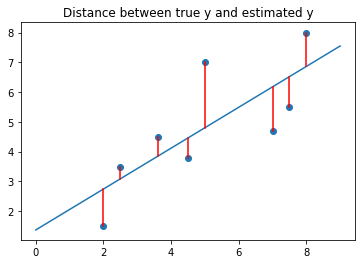

In [17]:
plt.scatter(X, Y)
plt.plot(X_plot, Y_plot)
plt.title('Distance between true y and estimated y')

for i in range(len(X)):
    x = X[i]
    y = Y[i]
    y_hat = model(x)
    plt.plot([x, x], [y, y_hat], color = 'red')